# Credit Card fraud detection

## Predicted whether the credit card transaction is fraud or not.

### Data analysis

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
pd.set_option('display.max_columns',100)

In [12]:
data_frame=pd.read_csv('creditcard.csv')

In [13]:
data_frame.head(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


The data of independent features is coverted to some unknown numerical values in ease of hiding the credentials and sensitive information of the user

In [14]:
data_frame.shape

(284807, 31)

In [15]:
#number of unique values in data.
for cols in data_frame.columns:
    print(cols,': ',len(data_frame[cols].unique()))

Time :  124592
V1 :  275663
V2 :  275663
V3 :  275663
V4 :  275663
V5 :  275663
V6 :  275663
V7 :  275663
V8 :  275663
V9 :  275663
V10 :  275663
V11 :  275663
V12 :  275663
V13 :  275663
V14 :  275663
V15 :  275663
V16 :  275663
V17 :  275663
V18 :  275663
V19 :  275663
V20 :  275663
V21 :  275663
V22 :  275663
V23 :  275663
V24 :  275663
V25 :  275663
V26 :  275663
V27 :  275663
V28 :  275663
Amount :  32767
Class :  2


In [18]:
data_frame['V1'].value_counts(ascending=False).head()

2.055797    77
1.245674    77
2.053311    62
1.302378    60
2.040211    53
Name: V1, dtype: int64

In [21]:
for cols in data_frame.columns:
    percentage=(len(data_frame[cols].unique())/len(data_frame[cols]))*100
    print(cols,': ',round(percentage,2),'% unique values')

Time :  43.75 % unique values
V1 :  96.79 % unique values
V2 :  96.79 % unique values
V3 :  96.79 % unique values
V4 :  96.79 % unique values
V5 :  96.79 % unique values
V6 :  96.79 % unique values
V7 :  96.79 % unique values
V8 :  96.79 % unique values
V9 :  96.79 % unique values
V10 :  96.79 % unique values
V11 :  96.79 % unique values
V12 :  96.79 % unique values
V13 :  96.79 % unique values
V14 :  96.79 % unique values
V15 :  96.79 % unique values
V16 :  96.79 % unique values
V17 :  96.79 % unique values
V18 :  96.79 % unique values
V19 :  96.79 % unique values
V20 :  96.79 % unique values
V21 :  96.79 % unique values
V22 :  96.79 % unique values
V23 :  96.79 % unique values
V24 :  96.79 % unique values
V25 :  96.79 % unique values
V26 :  96.79 % unique values
V27 :  96.79 % unique values
V28 :  96.79 % unique values
Amount :  11.5 % unique values
Class :  0.0 % unique values


Features from V1 to V28 has 96.79% unique values.

In [22]:
#missing values.
data_frame.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values.

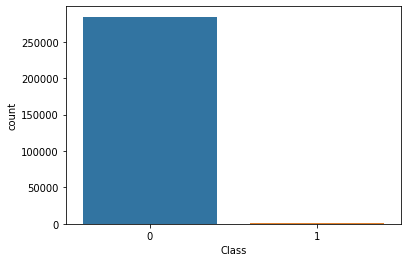

In [30]:
#visualizing output feature.
sns.countplot(data_frame['Class']);

In [41]:
data_frame['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [67]:
percentage=(data_frame['Class'].value_counts()[1]/len(data_frame['Class']))*100
print('Number of fraud transactions: ',data_frame['Class'].value_counts()[1])
print('Percentage: {}%'.format(round(percentage,2)))

Number of fraud transactions:  492
Percentage: 0.17%


In [70]:
#analyzing 'Time' feature.
time_fraud=data_frame[data_frame['Class']==1]['Time'].value_counts().index
for val in time_fraud:
    print(val)

68207.0
93879.0
84204.0
93853.0
93860.0
85285.0
94362.0
148053.0
102542.0
102489.0
100924.0
102572.0
102480.0
102318.0
102114.0
101597.0
101313.0
101051.0
100223.0
100501.0
100298.0
102622.0
97235.0
97121.0
96717.0
96291.0
96135.0
95628.0
95559.0
94952.0
94625.0
102619.0
406.0
102625.0
102669.0
128803.0
128595.0
128519.0
128471.0
126219.0
125658.0
125612.0
125200.0
123525.0
123078.0
122608.0
121238.0
118603.0
118532.0
116067.0
115691.0
110617.0
110552.0
110547.0
110087.0
109298.0
109297.0
103808.0
102676.0
102671.0
94364.0
93904.0
94141.0
76876.0
84694.0
83934.0
82289.0
81372.0
79540.0
78725.0
77627.0
77202.0
77182.0
77171.0
77154.0
76867.0
85181.0
76857.0
76845.0
76826.0
76575.0
75978.0
75851.0
75581.0
75556.0
75033.0
74262.0
74159.0
84789.0
85573.0
93965.0
91554.0
93920.0
129186.0
93897.0
93888.0
93856.0
93834.0
93824.0
93823.0
93742.0
92102.0
92092.0
91524.0
85576.0
91502.0
91407.0
91075.0
90676.0
88737.0
88672.0
87883.0
87202.0
86376.0
85867.0
85864.0
129095.0
129222.0
72824.0
1536

In [73]:
#analyzing the 'Amount' feature.
amount_fraud=data_frame[data_frame['Class']==1]['Amount'].value_counts().index
amount=[]
for val in amount_fraud:
    print(val)
    amount.append(val)

1.0
0.0
99.99
0.76
0.77
0.01
2.0
3.79
2.28
12.31
0.68
1.18
1.1
30.31
44.9
94.82
1.59
1.63
105.89
101.5
88.23
45.51
104.03
111.7
39.45
188.52
78.0
316.06
7.59
8.0
18.96
1.52
19.02
512.25
0.83
252.92
723.21
17.06
119.74
2.27
186.13
720.8
80.22
175.9
635.1
93.35
65.0
40.0
144.62
2125.87
11.0
67.9
25.0
3.22
39.98
9.82
346.94
37.93
6.99
38.76
52.69
245.0
261.22
18.0
600.73
75.86
8.54
209.65
97.0
104.0
11.4
45.48
33.76
571.48
33.59
8.64
77.89
0.92
147.87
22.04
7.18
480.72
4.87
6.74
237.26
9.29
10.7
57.73
2.47
357.95
247.86
51.37
349.08
1504.93
1096.99
35.0
3.9
80.9
19.95
3.14
7.06
187.11
4.97
634.3
296.0
4.9
156.0
39.9
4.69
127.14
50.0
17.39
122.68
996.27
362.55
276.17
0.38
1335.0
130.21
925.31
829.41
345.0
108.51
84.28
727.91
22.47
8.3
120.54
0.69
390.0
592.9
195.66
4.49
324.59
320.01
144.8
8.9
667.55
2.22
9.21
60.0
451.27
172.32
459.07
118.3
45.49
173.07
37.32
59.68
9.99
34.12
273.01
106.55
364.19
53.95
802.52
11.38
139.9
648.0
204.27
88.0
24.9
105.99
7.58
208.58
19.73
360.0
519.9
112.45
3

In [79]:
amount.sort(reverse=True)

In [81]:
print('Each fraud transaction amount: ',amount)

Fraud transaction amount:  [2125.87, 1809.68, 1504.93, 1402.16, 1389.56, 1354.25, 1335.0, 1218.89, 1096.99, 996.27, 925.31, 829.41, 824.83, 802.52, 776.83, 766.36, 730.86, 727.91, 723.21, 720.8, 720.38, 717.15, 667.55, 648.0, 635.1, 634.3, 600.73, 592.9, 571.48, 549.06, 529.0, 519.9, 512.25, 489.71, 480.72, 459.07, 454.82, 451.27, 444.17, 426.4, 390.0, 364.19, 362.55, 360.0, 357.95, 354.33, 349.08, 346.94, 345.0, 340.11, 324.59, 323.77, 320.01, 320.0, 319.2, 318.11, 316.06, 311.91, 311.28, 310.42, 296.0, 294.9, 290.18, 276.17, 273.01, 270.0, 261.87, 261.22, 254.76, 252.92, 247.86, 245.0, 240.77, 239.93, 238.9, 237.26, 227.3, 219.8, 209.65, 208.58, 204.27, 195.66, 188.78, 188.52, 187.11, 186.13, 180.0, 179.66, 175.9, 173.07, 172.32, 170.92, 156.0, 153.46, 147.87, 144.8, 144.62, 139.9, 130.44, 130.21, 129.0, 127.14, 125.3, 124.53, 122.68, 120.54, 119.74, 118.3, 113.92, 112.45, 112.33, 111.7, 108.51, 106.9, 106.55, 105.99, 105.89, 104.81, 104.03, 104.0, 101.5, 99.99, 99.9, 99.85, 98.01, 9

In [83]:
print('Total amount of fraud transaction: ',round(sum(amount),2))

Total amount of fraud transaction:  54448.19
